In [1]:
import noise_yum as n
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# plot parameters
plt.rcParams.update(plt.rcParamsDefault)
# plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (9, 4)

# force matplotlib to plot inline
%matplotlib inline
# %matplotlib qt

In [3]:
# Settings
ETA = 0.43  # detector responsivity [A/W]

GAIN_SIG = 1e4  # detector gain of signal
GAIN_LINOUT = 1e5  # detector gain of linear output

In [4]:
# define channel names
import pandas as pd
channels = [[1, 'SigDC'], [2, 'SigAC'], [3, 'LinOut']]
channels = pd.DataFrame(channels, columns=['column_index', 'name'])

linout_channel = channels['column_index'].loc[(channels['name'] == 'LinOut')]

In [6]:
# load detector
detector, detector_name = n.load_files("detector")

Select detector files
Converted 0 from (us) to SI (x1e6)
Converted 2 from (mV) to SI (x1e3)
Converted 3 from (mV) to SI (x1e3)
Converted 4 from (mV) to SI (x1e3)
Converted 0 from (us) to SI (x1e6)
Converted 2 from (mV) to SI (x1e3)
Converted 3 from (mV) to SI (x1e3)
Converted 4 from (mV) to SI (x1e3)
Converted 0 from (us) to SI (x1e6)
Converted 2 from (mV) to SI (x1e3)
Converted 3 from (mV) to SI (x1e3)
Converted 4 from (mV) to SI (x1e3)
Converted 0 from (us) to SI (x1e6)
Converted 2 from (mV) to SI (x1e3)
Converted 3 from (mV) to SI (x1e3)
Converted 4 from (mV) to SI (x1e3)
Converted 0 from (us) to SI (x1e6)
Converted 2 from (mV) to SI (x1e3)
Converted 3 from (mV) to SI (x1e3)
Converted 4 from (mV) to SI (x1e3)
Converted 0 from (us) to SI (x1e6)
Converted 2 from (mV) to SI (x1e3)
Converted 3 from (mV) to SI (x1e3)
Converted 4 from (mV) to SI (x1e3)
Converted 0 from (us) to SI (x1e6)
Converted 2 from (mV) to SI (x1e3)
Converted 3 from (mV) to SI (x1e3)
Converted 4 from (mV) to SI (x1e3

In [7]:
# calculate detector PSD
f_det, avg_psd_det = n.compute_psds(detector, channels['column_index'])

# 07 - locked, in treatment room (pre-beam)

In [8]:
# load signals
signals_1, signal_name_1 = n.load_files("signal")

Select signal files
Converted 0 from (us) to SI (x1e6)
Converted 2 from (mV) to SI (x1e3)
Converted 3 from (mV) to SI (x1e3)
Converted 4 from (mV) to SI (x1e3)
Converted 0 from (us) to SI (x1e6)
Converted 2 from (mV) to SI (x1e3)
Converted 3 from (mV) to SI (x1e3)
Converted 4 from (mV) to SI (x1e3)
Converted 0 from (us) to SI (x1e6)
Converted 2 from (mV) to SI (x1e3)
Converted 3 from (mV) to SI (x1e3)
Converted 4 from (mV) to SI (x1e3)
Converted 0 from (us) to SI (x1e6)
Converted 2 from (mV) to SI (x1e3)
Converted 3 from (mV) to SI (x1e3)
Converted 4 from (mV) to SI (x1e3)
Converted 0 from (us) to SI (x1e6)
Converted 2 from (mV) to SI (x1e3)
Converted 3 from (mV) to SI (x1e3)
Converted 4 from (mV) to SI (x1e3)
Converted 0 from (us) to SI (x1e6)
Converted 2 from (mV) to SI (x1e3)
Converted 3 from (mV) to SI (x1e3)
Converted 4 from (mV) to SI (x1e3)
Converted 0 from (us) to SI (x1e6)
Converted 2 from (mV) to SI (x1e3)
Converted 3 from (mV) to SI (x1e3)
Converted 4 from (mV) to SI (x1e3)


In [9]:
# calculate signal PSD
f_sig, avg_psd_sig = n.compute_psds(signals_1, channels['column_index'])

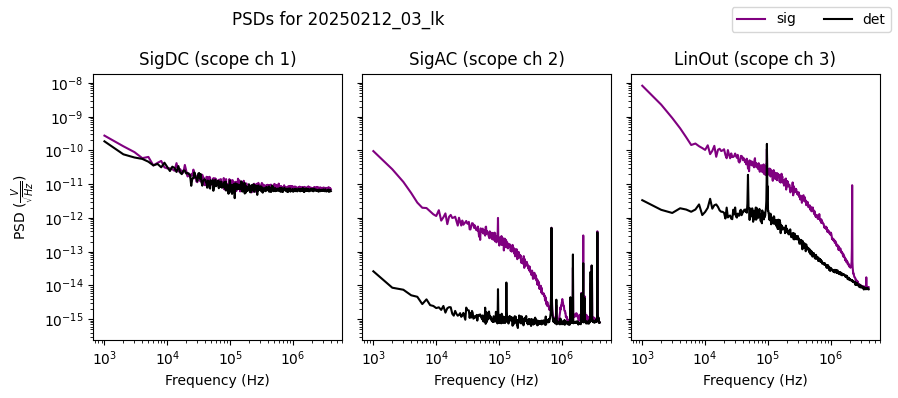

In [10]:
# plot each channel (signal and detector)
fig, ax = plt.subplots(1, len(channels.index), sharey=True)

for i, channel in channels.iterrows():
    ax[i].loglog(f_sig[i], avg_psd_sig[i], 'purple', label="Signal")
    ax[i].loglog(f_det[i], avg_psd_det[i], 'black', label="Detector")
    ax[i].loglog()
    ax[i].set_title(f"{channel['name']} (scope ch {channel['column_index']})")
    ax[i].set_xlabel("Frequency (Hz)")
    
fig.suptitle(f"PSDs for {signal_name_1}", ha='right')

ax[0].set_ylabel(r'PSD ($\frac{V}{\sqrt{Hz}}$)')
fig.legend(['sig', 'det'], loc='upper right', ncol=2)
plt.tight_layout()

In [11]:
# Calculate mean power
sig_dc = np.array([signal[1] for signal in signals_1])
mean_dc, power_dc = n.compute_mean_power(sig_dc, ETA, GAIN_SIG)
mean_linout = mean_dc * GAIN_LINOUT / GAIN_SIG

Mean 0.70 V
Standard deviation 0.01 V
RMS 0.70 V
Average power 0.0002 W


In [12]:
# Calculate RIN = (signal - detector) / (V^2)
rin_ac = n.compute_rin(avg_psd_sig[0], mean_dc, avg_psd_det[0])
rin_dc = n.compute_rin(avg_psd_sig[1], mean_dc, avg_psd_det[0])
rin_linout = n.compute_rin(avg_psd_sig[2], mean_linout, avg_psd_det[2])

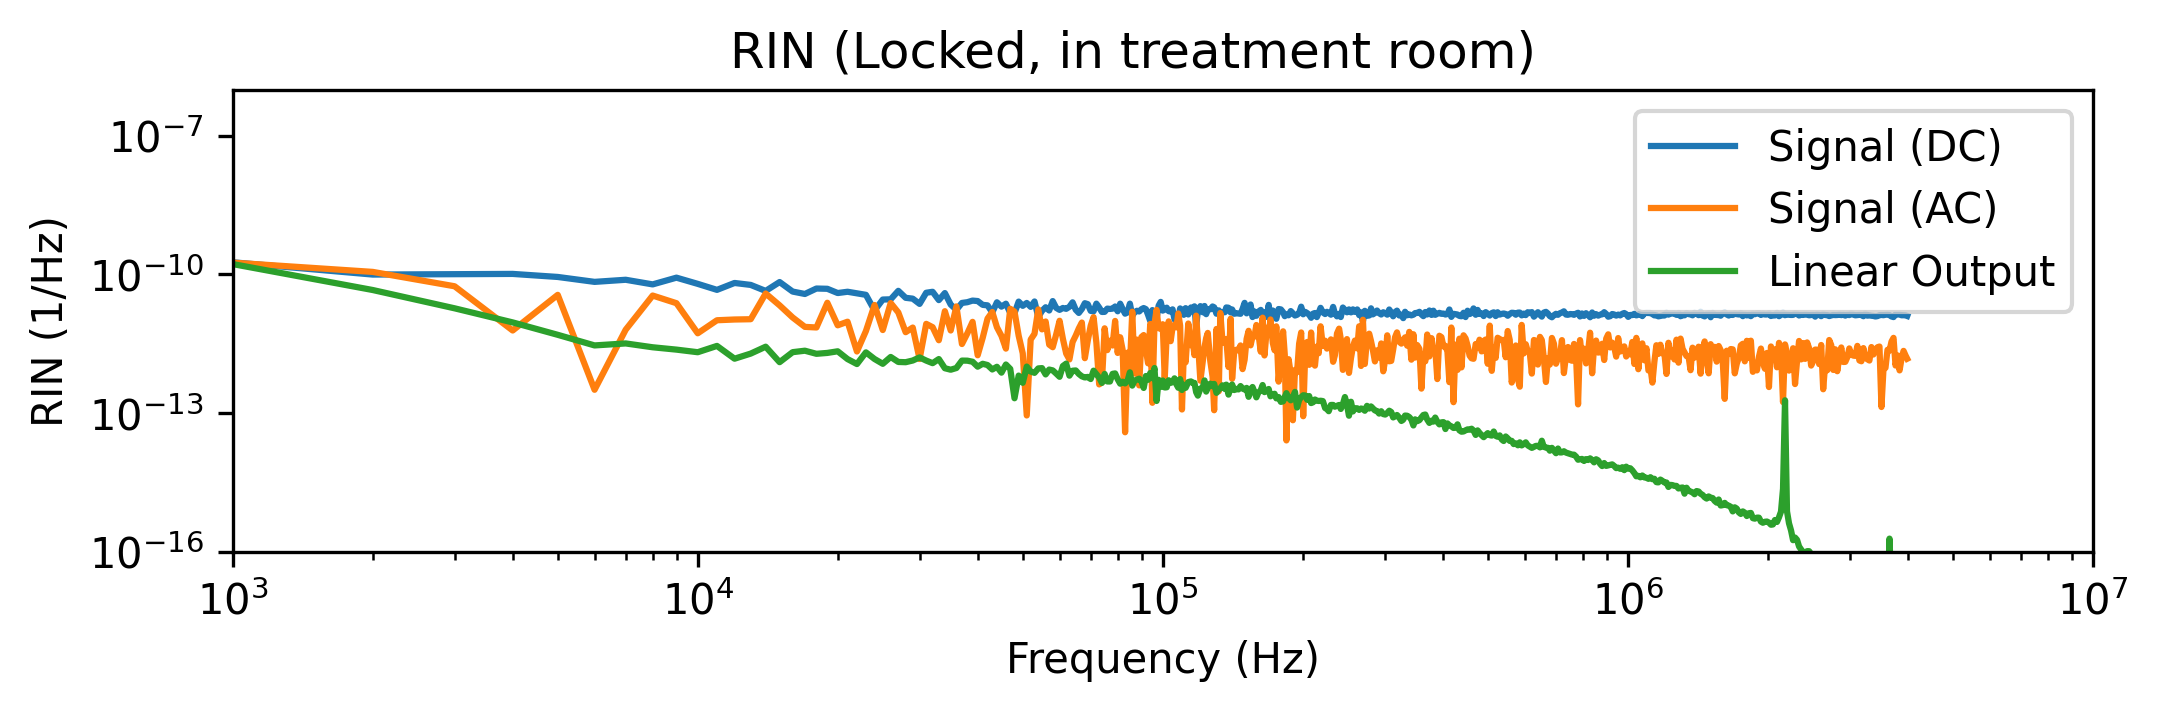

In [13]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 2)
plt.rcParams["figure.dpi"] = 300

fig, ax = plt.subplots()
ax.loglog(f_sig[0], rin_dc, label='Signal (DC)')
ax.loglog(f_sig[0], rin_ac, label='Signal (AC)')
ax.loglog(f_sig[0], rin_linout, label='Linear Output')

fig.suptitle('RIN (Locked, in treatment room)')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('RIN (1/Hz)')
ax.set_xlim(1e3, 1e7)
ax.set_ylim(1e-16, 1e-6)
ax.legend()